# Метод наименьших квадратов

Предположим, что нам требуется найти некоторую ф-ю f(x) как сумму некоторых известных (базисных) функций, взятых с постоянными коэффициентами
$$
f(x) = a_1 f_1(x) + a_2 f_2(x) + ... + a_m f_m(x)
$$
при этом известны значения ф-и f(x_i) = y_i для $n$ узлов. Также пусть $n>m$. В этом случае система на коэффициенты $a$, $Aa = y$, будет переопределенной. Для ее решения можно использовать метод, называемый Методом наименьших квадратов. Суть подобрать коэффициенты так, что решение было наилучшем в смысле минимизации среднеквадратичного отклонения по всем узлам:
$$
S = \sum_{i=1}^{n} \left(y_i - \sum_{j=1}^{m}a_j f_j(x_i)\right)^2
$$
несложно проверить, что минимизация $S$ даст систему вида $A^TAa = A^Tb$, решение которой и даст значения коэффициентов $a_i$.

# Задача на аппроксимацию с помощью МНК

Согласно термодинамическим таблицам Глушко, энергия Гиббса метана определяется соотношением $G =  256.0495 + 40.9175 \log(t) + -0.0253751 t^{-2} + 1.78548 t^{-1} + 240.1261 t + -173.732 t^2 + 72.624 t^3$, где $t = T/10000$, $T$ - температура. Если сравнить аппроксимацию Глушко с энергией Гиббса из термодинамических таблиц NIST, получим следующий результат.

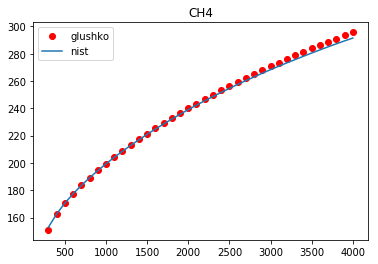

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

#ф-я, которая задает аппроксимацию энергии Гиббса по Глушко
def GlushkoG(T, a):
    t = T/10000
    return a[0] + a[1]*np.log(t) + a[2]*t**(-2) + a[3]*t**(-1) + a[4]*t + a[5]*t**2 + a[6]*t**3

#коэффициенты в аппроксимации для метана по Глушко
# 0        ln       -2          -1        1        2      3
CH4_appr = np.array([256.0495, 40.9175, -0.0253751,1.78548,240.1261, -173.732, 72.624])

# читаем данные из таблицы NIST
CH4_nist = np.loadtxt("CH4_nist.txt", usecols = (0,3))
# после чтения таблицы в двумерном массиве CH4_nist в первом столбце будут темепратуры,
# во втором - энергия Гиббса для этих температур
dH_CH4 = 10.016*1000
for i in range(0, CH4_nist[:,0].size):
    CH4_nist[i,1] -= dH_CH4/CH4_nist[i,0]

# отрисовываем аппроксимацию Глушко вместе с точками из таблицы NIST
plt.plot(CH4_nist[:,0],GlushkoG(CH4_nist[:,0], CH4_appr), 'or', label = 'glushko')
                                #как будет подписан график в легенде
plt.plot(CH4_nist[:,0],CH4_nist[:,1], label = 'nist')
#plt.plot(CH4_nist[:,0],np.abs(CH4_nist[:,1] - GlushkoG(CH4_nist[:,0], CH4_appr))/CH4_nist[:,1]*100, label = 'err')
plt.title('CH4')
plt.legend(loc = 'upper left') #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять

Видно, что для высоких температур есть рассхождение аппроксимации Глушко с таблицами NIST. Необходимо так скорректировать коэффициенты, чтобы это рассхождение стало меньше. Для этого используем МНК.

In [11]:
import numpy as np
import scipy.linalg as la

# вычисляем значением базисных ф-й для всех значений температур таблицы NIST
def basisFuncMatrix(Temps):
    A = np.zeros((Temps.size, 7)) 
    for i in range(Temps.size):
        t = Temps[i]/10000
        A[i][0] = 1
        A[i][1] = np.log(t)
        A[i][2] = t**(-2)
        A[i][3] = t**(-1)
        A[i][4] = t
        A[i][5] = t**2
        A[i][6] = t**3 
    return A

A = basisFuncMatrix(CH4_nist[:,0])
# решаем систему МНК
CH4_new_appr = la.solve(A.T.dot(A), A.T.dot(CH4_nist[:,1]))

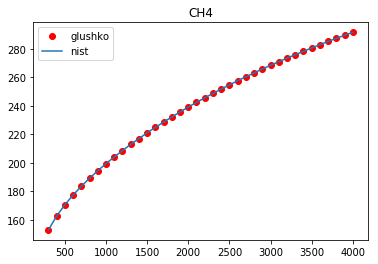

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt

CH4_nist = np.loadtxt("CH4_nist.txt", usecols = (0,3))
for i in range(0, CH4_nist[:,0].size):
    CH4_nist[i,1] -= dH_CH4/CH4_nist[i,0]

# здесь используем новые коэффициенты в аппроксимации CH4_new_appr
plt.plot(CH4_nist[:,0],GlushkoG(CH4_nist[:,0], CH4_new_appr), 'or', label = 'glushko')
                                #как будет подписан график в легенде
plt.plot(CH4_nist[:,0],CH4_nist[:,1], label = 'nist')
#plt.plot(CH4_nist[:,0],np.abs(CH4_nist[:,1] - GlushkoG(CH4_nist[:,0], CH4_appr))/CH4_nist[:,1]*100, label = 'err')
plt.title('CH4')
plt.legend(loc = 'upper left') #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять

Теперь видно, что совпадение лучше.

# Задача динамического рассеяния света (DLS)

Решение задачи динамического рассеяния света (DLS) позволяет определять размеры частиц в растворе по спектру интенсивности рассеяного света. Если растворе представлен один сорт частиц, то спектр итенсивности для нее определяется кривой Лоренца:
$$
I(f) = \frac{A}{\pi} \frac{\Gamma}{(2\pi f)^2 + \Gamma^2}
$$
Здесь $f$ - частота, $\Gamma$ - характеристика частицы, обратно пропорциональная ее диаметру.

Для раствора, содержащего $n$ частиц, спектр интенсивности есть сумма Лоренцов для каждой отдельной частицы, взятых с определенным весом, пропорциональным их концентрации:
$$
I(f) = \frac{1}{\pi} \sum_{i=1}^n\frac{A(\Gamma_i)\Gamma_i}{(2\pi f)^2 + \Gamma_i^2}
$$

В результате эксперимента методом DLS получается кривая интенсивности рассеяния, по которой необходимо определить частицы каких размеров представлены в растворе. Предполагая, что 

In [78]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as sklm
import scipy

# основные константы. В этой части определяется все, что связано с постановкой эксперимента
kb = 1.38064e-23 # постоянная Больцмана
T = 273.15 + 22 # температура в K
theta = np.pi/2 # угол рассеяния
n = 1.333 # показатель преломления
eta = 0.958e-3 # Н * с/м^2 - динамическая вязкость воды
l = 650e-9 # Длина волны лазера

# далее задаем коэффициент, связывающий характеритику Gamma с размером частицы
coeff = 2*(kb * T/(3 * np.pi * eta)) * (4 * np.pi * n / l)**2 * np.sin(theta/2)**2
d1 = 200e-9
G1 = coeff / d1 # Gamma для частицы размером 200 нм
d2 = 100e-10
G2 = coeff / d2

# определяем кривые Лоренца для частиц
w = 2.0*np.arange(1,5001)
y1 = G1 / ((2 * np.pi * w)**2 + G1**2)
y2 = G2 / ((2 * np.pi * w)**2 + G2**2)
y = y1 + y2
#y = y1

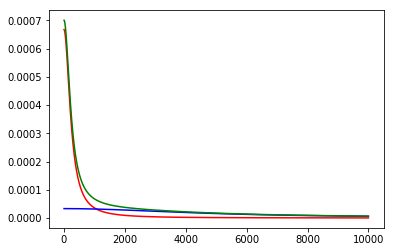

In [79]:
%matplotlib inline
from matplotlib import pyplot as plt

# кривая Лоренца
plt.plot(w, y1, 'red')  # w - частота, y - I(f)
plt.plot(w, y2, 'blue')
plt.plot(w, y, 'green')

In [80]:
# диапазон размеров частиц, где ищем нужный размер 
d_min = 1e-9 # 1 нм
d_max = 1e-6 

# задаем сетку по Gamma
G_min = coeff/d_max
G_max = coeff/d_min
N = 256*8 # Число узлов в сетке по \Gamma
M = w.size # Число точек по частоте
p = (G_max/G_min)**(1/(N-1))
G = np.zeros(N)

# неравнмерная сетка со сгущением к нулю (так как больщий вклад в интенсивность дают крупные частицы)
# хотя такая сетка - это не единственно возможный вариант
for j in range(N):
     G[j] = G_min * (p**j)
    # вот равномерная сетка
    # G = np.linspace(G_min, G_max, N)    

A = np.zeros((M,N))

# Матрица коэффициентов (составляется по базисным ф-ям)
for i in range(M):
    for j in range(N):
        A[i,j] = G[j] / ((2 * np.pi * w[i])**2 + G[j]**2)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

ValueError: num must be 1 <= num <= 8, not 9

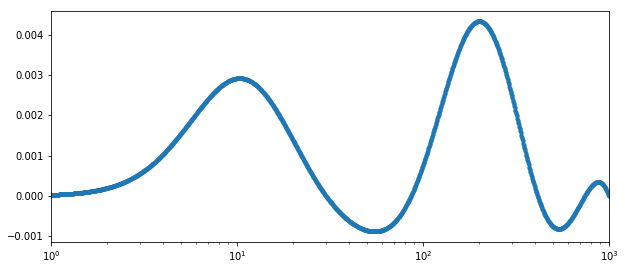

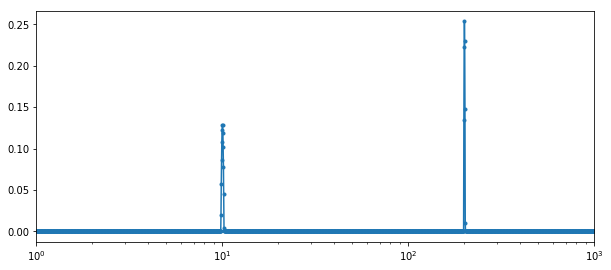

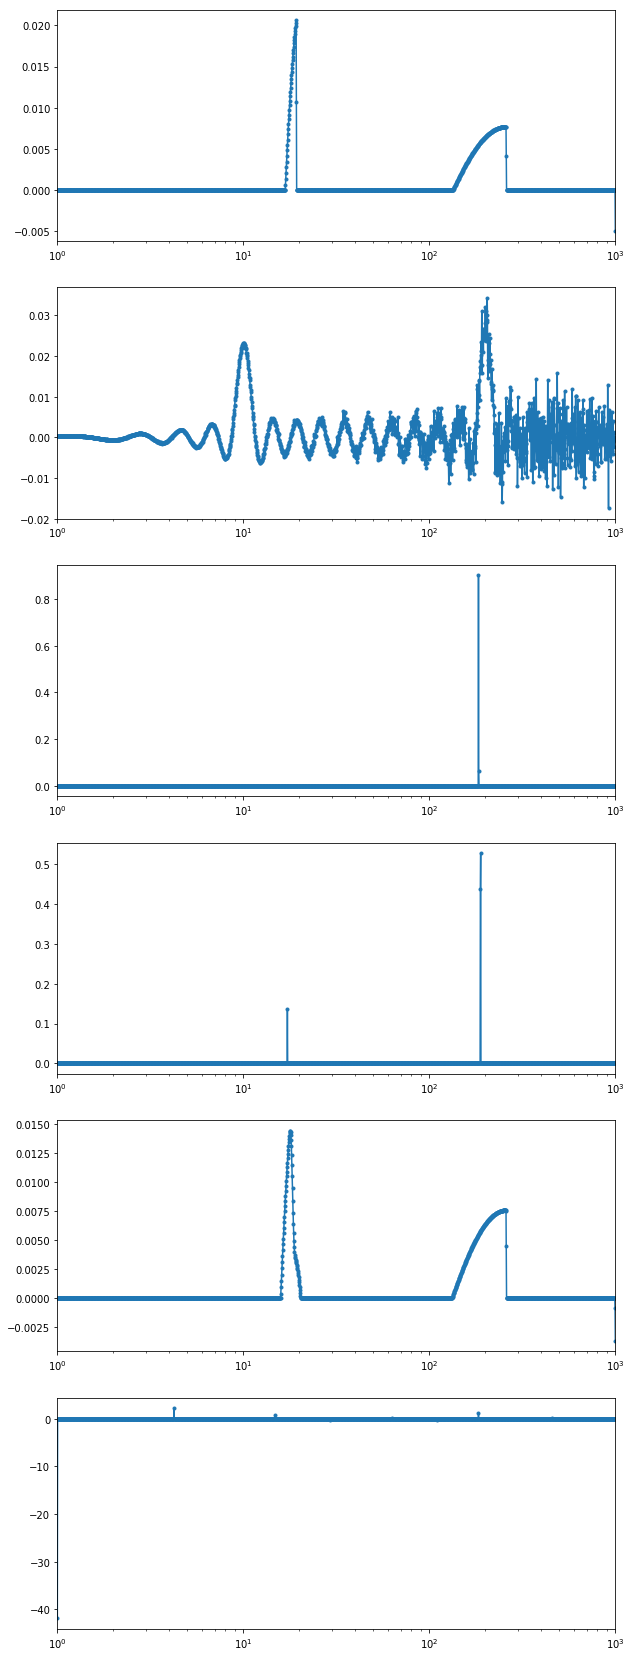

In [81]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #width
fig_size[1] = 40 #height
plt.rcParams["figure.figsize"] = fig_size

num_of_methods=8
num=1
# Три метода решения переопределенной системы: Тихоновская регуляризация, неотрицательная Тихоновская регялризация и метод Лассо
# Ridge regression
clf = sklm.Ridge(alpha = 5e-7)
clf.fit(A, y)
a1 = clf.coef_

# fig = plt.figure()
ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a1,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# Non-negative ridge regression
alpha = 1.3e-7
B = np.zeros((M+N, N))
B[0:M,:] = A
B[M::, :] = alpha * np.eye(N)
y_ = np.zeros(M+N)
y_[0:M] = y
a2, rnorm = scipy.optimize.nnls(B,y_)

fig = plt.figure()
ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a2,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# Lasso regression
clf = sklm.LassoCV()
clf.fit(A, y)
a3 = clf.coef_

fig = plt.figure()
ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

#############################################################
# #My methods
# # МНК
# ATA_inv = np.linalg.inv(np.dot(A.T, A))
# ATy = np.dot(A.T, y)
# a4 = np.dot(ATA_inv, ATy)

# ax = plt.subplot(num_of_methods,1,num)
# line, = plt.plot(1e+9 * coeff/G, np.abs(a4),'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)
# num += 1

# МНК good
clf = sklm.LinearRegression()
clf.fit(A,y)
a3 = clf.coef_

ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# # RidgeCV regression
# clf = sklm.RidgeCV()
# clf.fit(A, y)
# a3 = clf.coef_
# print(clf.alpha_)

# ax = plt.subplot(num_of_methods,1,num)
# line, = plt.plot(1e+9 * coeff/G, a3,'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)
# num += 1

# # LassoCV

# LassoLarsCV
clf = sklm.LassoLarsCV()
clf.fit(A, y)
a3 = clf.coef_

ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# LassoLarsIC
clf = sklm.LassoLarsIC()
clf.fit(A, y)
a3 = clf.coef_

ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# # MultiTaskLassoCV
# clf = sklm.MultiTaskLassoCV()
# clf.fit(A, y)
# a3 = clf.coef_

# ax = plt.subplot(num_of_methods,1,num)
# line, = plt.plot(1e+9 * coeff/G, a3,'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)
# num += 1

# ElasticNetCV
clf = sklm.ElasticNetCV()
clf.fit(A, y)
a3 = clf.coef_

ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# # MultiTaskElasticNetCV
# clf = sklm.MultiTaskElasticNetCV()
# clf.fit(A, y)
# a3 = clf.coef_

# ax = plt.subplot(num_of_methods,1,num)
# line, = plt.plot(1e+9 * coeff/G, a3,'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)
# num += 1

#OrthogonalMatchingPursuit
clf = sklm.OrthogonalMatchingPursuit()
clf.fit(A,y)
a3 = clf.coef_

ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# BayesianRidge
clf = sklm.BayesianRidge()
clf.fit(A,y)
a3 = clf.coef_

ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

# # ARDRegression
# clf = sklm.ARDRegression(n_iter=1, compute_score=True)
# clf.fit(A,y)
# a3 = clf.coef_

# ax = plt.subplot(num_of_methods,1,num)
# line, = plt.plot(1e+9 * coeff/G, a3,'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)
# num += 1



In [85]:
# определяем размер частицы, для которой получился максимальный коэффициент
import scipy.signal
indexes, _ = scipy.signal.find_peaks(a3, height=0, distance=50)
print('Peaks are: %s' % (1e+9*coeff/G[indexes]))
# i, = np.where( a2==max(a2) )
# print('Particle size = ', 1e+9*coeff/G[i])

Peaks are: [859.11208655 201.3071991   10.22752137]


In [8]:
import scipy.stats
a3 = kstats(A, 2)
a3 = clf.coef_

ax = plt.subplot(num_of_methods,1,num)
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)
num += 1

IndentationError: expected an indented block (<ipython-input-8-03f3fa58040d>, line 97)

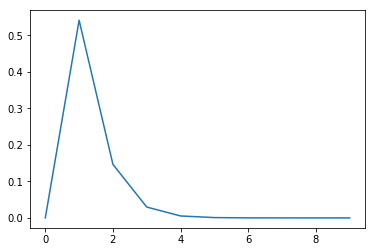

In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt

g_ = 1
z = 1
G = lambda g: (1/g_) * ((z+1)**(z+1)/math.factorial(z)) * (g/g_)**z * math.exp(-g/g_*(z+1))

# g = np.linspace(0, 3, 100)
# y = G(g)
# plt.plot(x, y)
# plt.show()
################################
v_size = 10
x = np.zeros(v_size)
y = np.zeros(v_size)
for i in range(v_size):
    x[i] = i
    y[i] = G(x[i])
plt.plot(x, y)
plt.show()


# основные константы. В этой части определяется все, что связано с постановкой эксперимента
kb = 1.38064e-23 # постоянная Больцмана
T = 273.15 + 22 # температура в K
theta = np.pi/2 # угол рассеяния
n = 1.333 # показатель преломления
eta = 0.958e-3 # Н * с/м^2 - динамическая вязкость воды
l = 650e-9 # Длина волны лазера

# далее задаем коэффициент, связывающий характеритику Gamma с размером частицы
coeff = 2*(kb * T/(3 * np.pi * eta)) * (4 * np.pi * n / l)**2 * np.sin(theta/2)**2
d1 = 200e-9
G1 = coeff / d1 # Gamma для частицы размером 200 нм


In [41]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = np.array([ [2.3, 4.3, 2.5],  [1.3, 5.2, 5.2],  [3.3, 2.9, 0.8],  [3.1, 4.3, 4.0]  ])
trainingScores  = np.array( [3.4, 7.5, 4.5, 1.6] )
predictionData  = np.array([ [2.5, 2.4, 2.7],  [2.7, 3.2, 1.2] ])

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[3.95570063 4.23426243] 

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
[2.80490383 2.63174081] 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
[4.24761983 4.24557448] 

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
[4.25 4.25] 

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
